In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load in csv
df = pd.read_csv('6-class-csv.csv')
features = df.iloc[:, [i for i in range(df.shape[1]) if i != 4]]
labels = df.iloc[:, 4]

print(labels)

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Name: Star type, Length: 240, dtype: int64


In [3]:
print(df)

     Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0               3068          0.002400        0.1700                   16.12   
1               3042          0.000500        0.1542                   16.60   
2               2600          0.000300        0.1020                   18.70   
3               2800          0.000200        0.1600                   16.65   
4               1939          0.000138        0.1030                   20.06   
..               ...               ...           ...                     ...   
235            38940     374830.000000     1356.0000                   -9.93   
236            30839     834042.000000     1194.0000                  -10.63   
237             8829     537493.000000     1423.0000                  -10.73   
238             9235     404940.000000     1112.0000                  -11.23   
239            37882     294903.000000     1783.0000                   -7.80   

     Star type Star color Spectral Clas

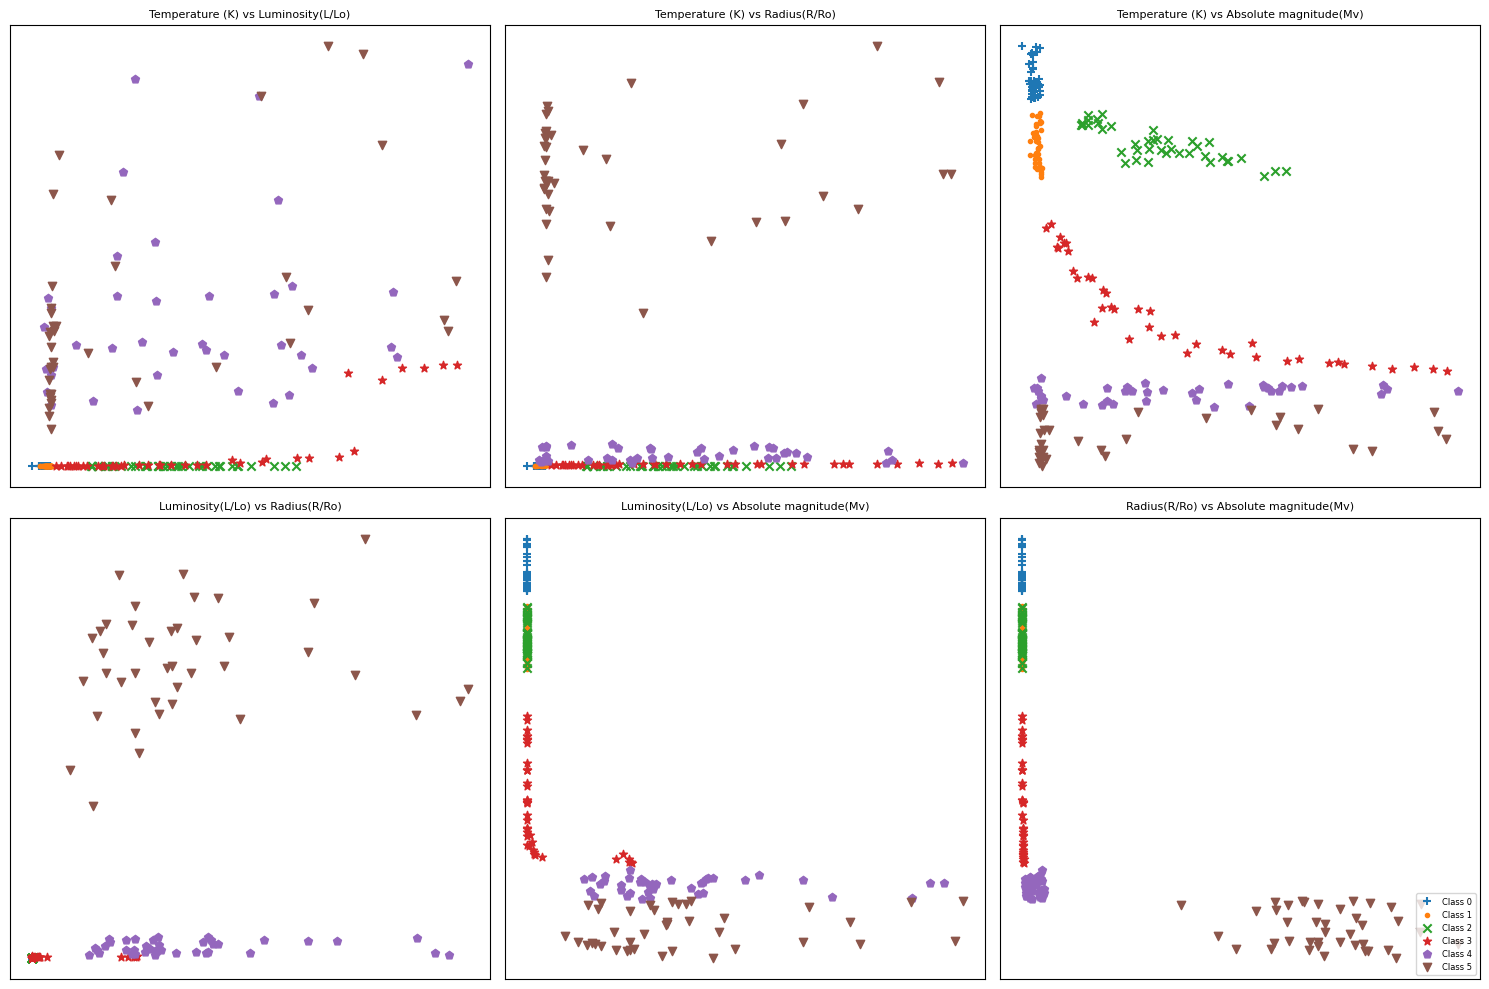

In [4]:
# Copied the plotting from 07_KNN.ipynb, modified for our purposes
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 100

#  'Star color', 'Spectral Class' are categorical, need to know how to use them, if possible
metrics = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
pairs = [(i, j) for i in range(4) for j in range(4) if i < j]
marks = ['+', '.', 'x', '*', 'p', 'v']  # we have 6 classes, so 6 markers?
class_labels = [0, 1, 2, 3, 4, 5]

fig, ax = plt.subplots(2, 3)
ax = ax.tolist()

# Made 5 dataframes each containing only the specific star type (0,1,2,3,4,5)
# Brown Dwarf -> Star Type = 0
# Red Dwarf -> Star Type = 1
# White Dwarf-> Star Type = 2
# Main Sequence -> Star Type = 3
# Supergiant -> Star Type = 4
# Hypergiant -> Star Type = 5

dfs = [
    df[df['Star type'] == 0],
    df[df['Star type'] == 1],
    df[df['Star type'] == 2],
    df[df['Star type'] == 3],
    df[df['Star type'] == 4],
    df[df['Star type'] == 5]
]

for row in range(2):
    for col in range(3):
        i, j = pairs[3 * row + col]
        ax[row][col].set_title(f"{metrics[i]} vs {metrics[j]}", fontsize=8)
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])

        for mark, label, class_df in zip(marks, class_labels, dfs):
            xs = class_df[metrics[i]]
            ys = class_df[metrics[j]]
            ax[row][col].scatter(xs, ys, marker=mark, label=f"Class {label}")

ax[-1][-1].legend(loc='lower right', prop={'size': 6})

plt.tight_layout()
plt.savefig("knn_scatter_grid.png")


In [5]:
# Copied from KNN notebook, modified for our purposes
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

input_features = df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']]
class_label = df["Star type"]

# split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(input_features, class_label, test_size=0.2, random_state=27)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# fit a k-nearest neighbor model to the data
model = KNeighborsClassifier(5)

# fit/train the model on the training data
model.fit(X_train, y_train)

# make predictions on the training data
y_train_predicted = model.predict(X_train)

# summarize the fit of the model
# support: the number of occurrences of each class
# macro average: averaging the unweighted mean for each metric
# weighted average: averaging the support-weighted mean for each metric
knn_5_report = metrics.classification_report(y_train, y_train_predicted)
knn_5_matrix = metrics.confusion_matrix(y_train, y_train_predicted)
print(knn_5_report)
print(knn_5_matrix)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        31
           3       0.97      1.00      0.99        35
           4       1.00      0.97      0.98        33
           5       1.00      1.00      1.00        30

    accuracy                           0.99       192
   macro avg       1.00      0.99      1.00       192
weighted avg       0.99      0.99      0.99       192

[[30  0  0  0  0  0]
 [ 0 33  0  0  0  0]
 [ 0  0 31  0  0  0]
 [ 0  0  0 35  0  0]
 [ 0  0  0  1 32  0]
 [ 0  0  0  0  0 30]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         9
           3       0.71      1.00      0.83         5
           4       1.00      0.71      0.83         7
           5       1.00      1.00      1.00        10

    accuracy                           0.96        48
   macro avg       0.95      0.95      0.94        48
weighted avg       0.97      0.96      0.96        48

[[10  0  0  0  0  0]
 [ 0  7  0  0  0  0]
 [ 0  0  9  0  0  0]
 [ 0  0  0  5  0  0]
 [ 0  0  0  2  5  0]
 [ 0  0  0  0  0 10]]


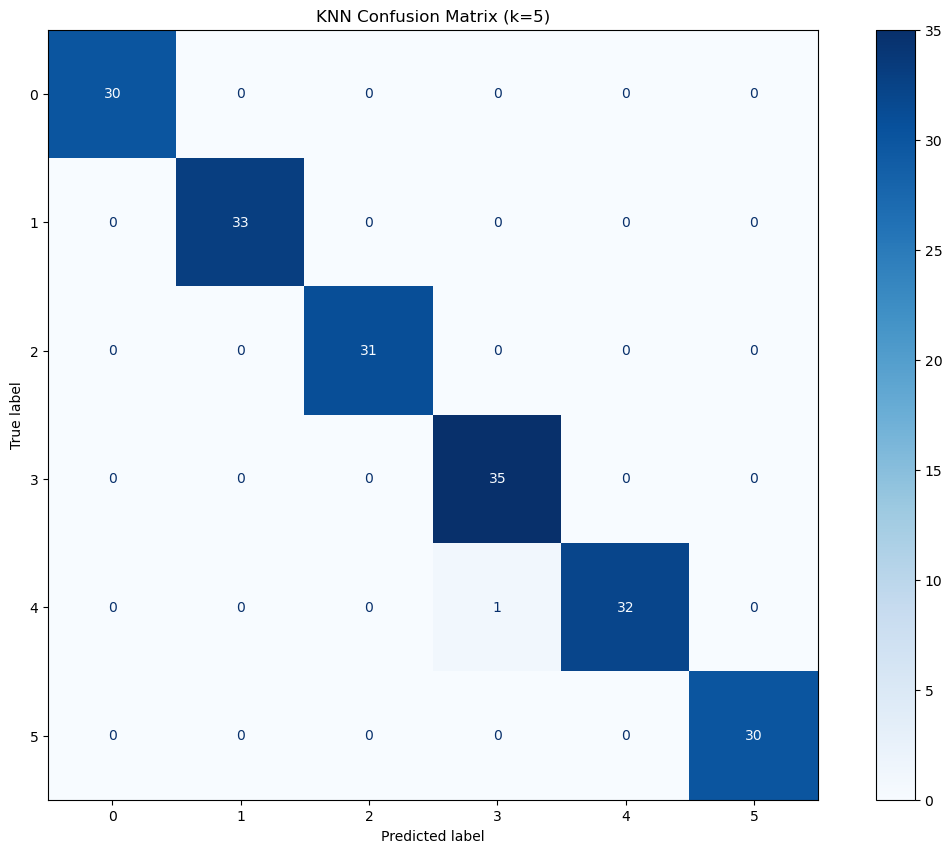

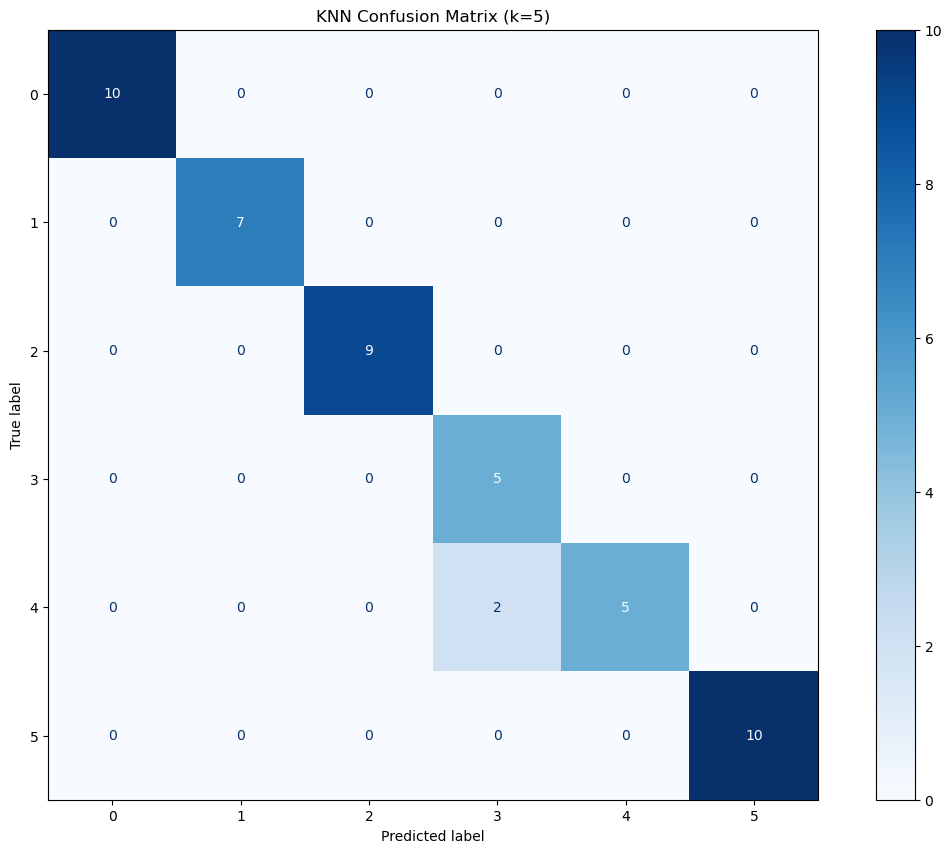

In [6]:
# make predictions on the testing data
# NOTE: DO NOT refit the model on the testing data
y_test_predicted = model.predict(X_test)

# summarize the fit of the model
knn_5_finalreport = metrics.classification_report(y_test, y_test_predicted)
knn_5_finalmatrix = metrics.confusion_matrix(y_test, y_test_predicted)
print(knn_5_finalreport)
print(knn_5_finalmatrix)

from sklearn.metrics import ConfusionMatrixDisplay
# Create and plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=knn_5_matrix,
                              display_labels=model.classes_)
disp.plot(cmap='Blues')  # You can also use 'Blues', 'plasma', etc.
plt.title(f"KNN Confusion Matrix (k={5})")
plt.savefig("training_confusion_matrix_5.png")
plt.show()
disp = ConfusionMatrixDisplay(confusion_matrix=knn_5_finalmatrix,
                              display_labels=model.classes_)
disp.plot(cmap='Blues')  # You can also use 'Blues', 'plasma', etc.
plt.title(f"KNN Confusion Matrix (k={5})")
plt.savefig("testing_confusion_matrix_5.png")
plt.show()

# Running a for loop for several k's #

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Note: You'll need to define X_train, y_train, X_test, y_test, and metrics
# The provided code assumes these are already loaded and split.

# 1. Define the range of k values to test
k_range = range(1, 95) # Testing k from 1 to 95 (95 is the last k since it crashes when doing more
                        # most likely not necessary

# 2. Create lists/arrays to store the results
# Storing the K value, Training Accuracy, and Test Accuracy
results = []

print("K-NN Model Performance for different K values:")
print("-" * 50)

# 3. Loop through the k values
for k in k_range:
    # 4. Fit a k-nearest neighbor model to the data
    model = KNeighborsClassifier(n_neighbors=k)

    # fit/train the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the training data
    y_train_predicted = model.predict(X_train)

    # make predictions on the testing data
    y_test_predicted = model.predict(X_test)

    # Calculate Accuracy Scores
    train_accuracy = accuracy_score(y_train, y_train_predicted)
    test_accuracy = accuracy_score(y_test, y_test_predicted)

    # Store the results
    results.append({
        'k': k,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy
    })

    # Optional: Print summary for each k
    print(f"K={k}: Train Accuracy = {train_accuracy:.4f}, Test Accuracy = {test_accuracy:.4f}")

# 5. Analyze the stored results
# Convert the list of dictionaries to a DataFrame for easier analysis (if you are using pandas)
# If using only Python lists, you can loop through the results list.

K-NN Model Performance for different K values:
--------------------------------------------------
K=1: Train Accuracy = 1.0000, Test Accuracy = 1.0000
K=2: Train Accuracy = 0.9896, Test Accuracy = 0.9583
K=3: Train Accuracy = 0.9948, Test Accuracy = 0.9792
K=4: Train Accuracy = 0.9948, Test Accuracy = 0.9375
K=5: Train Accuracy = 0.9948, Test Accuracy = 0.9583
K=6: Train Accuracy = 0.9948, Test Accuracy = 0.9375
K=7: Train Accuracy = 0.9948, Test Accuracy = 0.9583
K=8: Train Accuracy = 0.9948, Test Accuracy = 0.9375
K=9: Train Accuracy = 0.9896, Test Accuracy = 0.9375
K=10: Train Accuracy = 0.9948, Test Accuracy = 0.9375
K=11: Train Accuracy = 0.9948, Test Accuracy = 0.9375
K=12: Train Accuracy = 0.9844, Test Accuracy = 0.9375
K=13: Train Accuracy = 0.9896, Test Accuracy = 0.9583
K=14: Train Accuracy = 0.9792, Test Accuracy = 0.9583
K=15: Train Accuracy = 0.9844, Test Accuracy = 0.9583
K=16: Train Accuracy = 0.9635, Test Accuracy = 0.9375
K=17: Train Accuracy = 0.9688, Test Accuracy = 

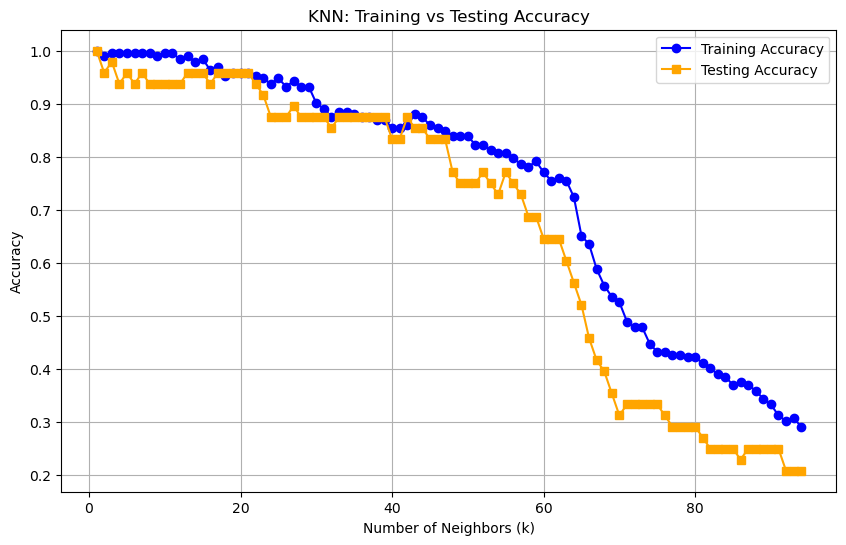

In [8]:
# Extract values from results
k_values = [r['k'] for r in results]
train_acc = [r['train_accuracy'] for r in results]
test_acc = [r['test_accuracy'] for r in results]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_acc, label='Training Accuracy', marker='o', color='blue')
plt.plot(k_values, test_acc, label='Testing Accuracy', marker='s', color='orange')

# Label and style
plt.title('KNN: Training vs Testing Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Optional: save the figure
plt.savefig('knn_train_test_accuracy.png', dpi=300, bbox_inches='tight')

plt.show()

In [9]:
# Example of finding the best k based on test accuracy:
best_k = None
max_test_accuracy = 0

for result in results:
    if result['test_accuracy'] > max_test_accuracy:
        max_test_accuracy = result['test_accuracy']
        best_k = result['k']

print("-" * 50)
print(f"The best K value based on max test accuracy is **k = {best_k}** with an accuracy of **{max_test_accuracy:.4f}**.")

# Train the final, best model
best_k = 20
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)

y_train_predicted = best_model.predict(X_train)

print("\n--- Training Classification Report (Best Model) ---")
train_report = metrics.classification_report(y_train, y_train_predicted)
train_matrix = metrics.confusion_matrix(y_train, y_train_predicted)
print(train_report)
print(train_matrix)

# Make predictions on the test data using the best model
y_test_predicted_best = best_model.predict(X_test)

# Get the final classification report and confusion matrix
final_report = metrics.classification_report(y_test, y_test_predicted_best)
final_matrix = metrics.confusion_matrix(y_test, y_test_predicted_best)

print("\n--- Testing Classification Report (Best Model) ---")
print(final_report)

print("\n--- Final Confusion Matrix (Best Model) ---")
print(final_matrix)

--------------------------------------------------
The best K value based on max test accuracy is **k = 1** with an accuracy of **1.0000**.

--- Training Classification Report (Best Model) ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.87      1.00      0.93        33
           2       1.00      0.90      0.95        31
           3       0.92      0.94      0.93        35
           4       1.00      0.91      0.95        33
           5       1.00      1.00      1.00        30

    accuracy                           0.96       192
   macro avg       0.96      0.96      0.96       192
weighted avg       0.96      0.96      0.96       192

[[30  0  0  0  0  0]
 [ 0 33  0  0  0  0]
 [ 0  3 28  0  0  0]
 [ 0  2  0 33  0  0]
 [ 0  0  0  3 30  0]
 [ 0  0  0  0  0 30]]

--- Testing Classification Report (Best Model) ---
              precision    recall  f1-score   support

           0       1.00      1

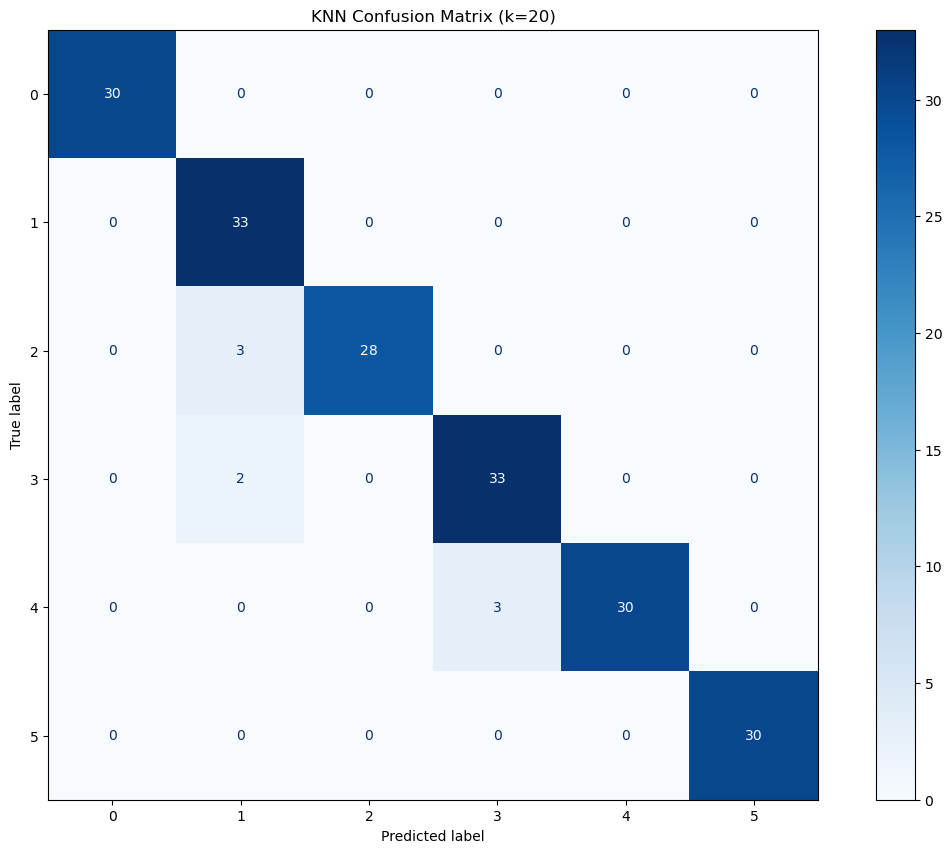

In [10]:
# Create and plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=train_matrix,
                              display_labels=best_model.classes_)
disp.plot(cmap='Blues')  # You can also use 'Blues', 'plasma', etc.
plt.title(f"KNN Confusion Matrix (k={best_k})")
plt.savefig("training_confusion_matrix.png")
plt.show()

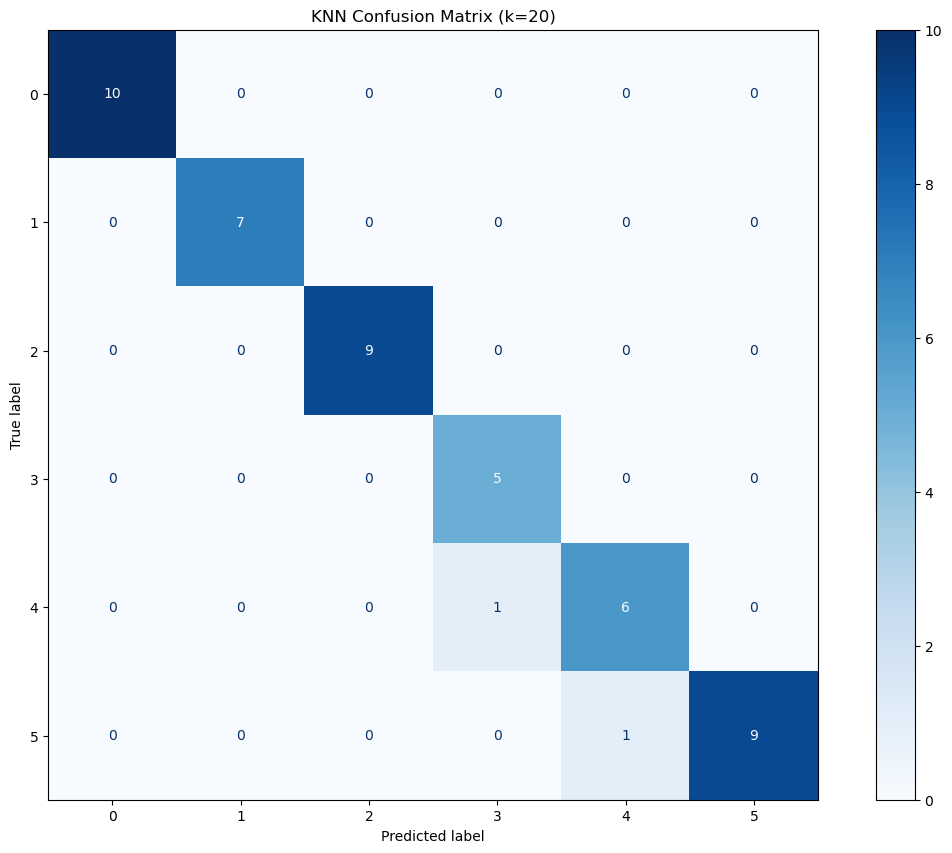

In [11]:
# Create and plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=final_matrix,
                              display_labels=best_model.classes_)
disp.plot(cmap='Blues')  # You can also use 'Blues', 'plasma', etc.
plt.title(f"KNN Confusion Matrix (k={best_k})")
plt.savefig("testing_confusion_matrix.png")
plt.show()

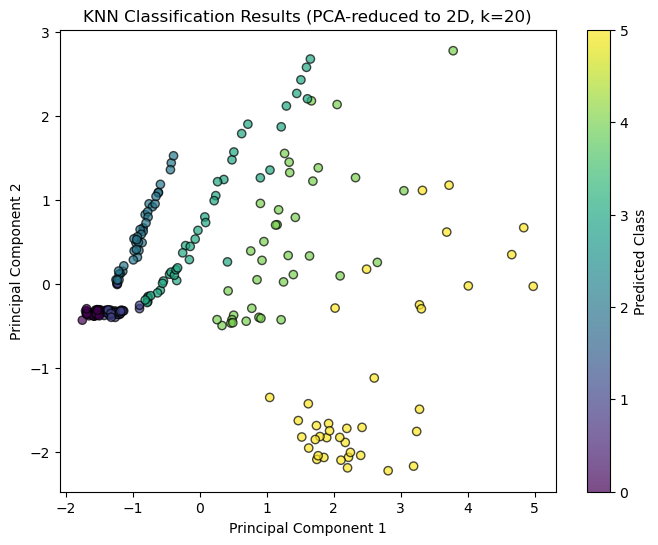

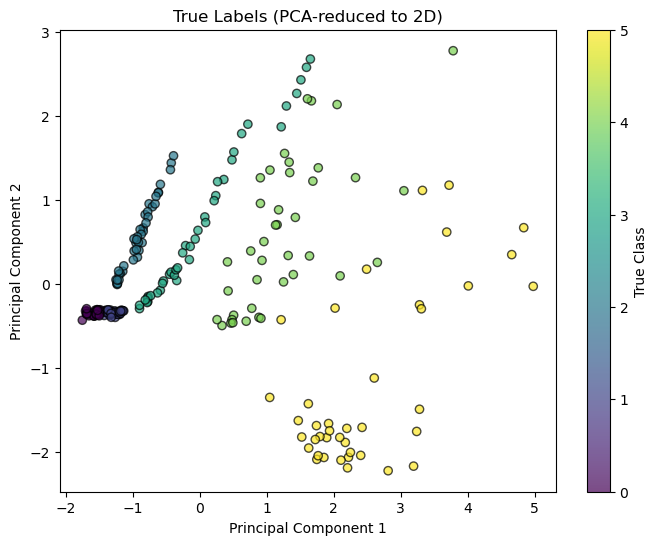

In [12]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

X_all = np.vstack((X_train, X_test))
y_all = np.hstack((y_train, y_test))
# Standardize the features
#scaler = StandardScaler()
#scaled_features = X_train

y_pred_all = best_model.predict(X_all)

# Perform PCA
pca = PCA(n_components=2)
X_all_2D = pca.fit_transform(X_all)

# Plot predicted clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_all_2D[:, 0], X_all_2D[:, 1], c=y_pred_all, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title(f"KNN Classification Results (PCA-reduced to 2D, k={best_k})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Predicted Class")
plt.show()

# Optionally, compare to true labels
plt.figure(figsize=(8, 6))
plt.scatter(X_all_2D[:, 0], X_all_2D[:, 1], c=y_all, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title("True Labels (PCA-reduced to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="True Class")
plt.show()